In [1]:
import pandas as pd
from msresist.pre_processing import preprocessing
from msresist.clustering import DDMC, PSPLdict
import matplotlib.pyplot as plt
from msresist.figures.figure3 import plotMotifs

In [2]:
# from msresist.pre_processing import filter_NaNpeptides

# X = pd.read_csv("msresist/data/MS/CPTAC/CPTAC-preprocessedMotfis.csv").iloc[:, 1:]
# print(X.shape)
# X = filter_NaNpeptides(X, tmt=2)
# X

In [4]:
X = preprocessing(Axlmuts_ErlAF154=True, Vfilter=True, FCfilter=True, log2T=True, mc_row=True)
d = X.select_dtypes(include=['float64']).T
i = X.select_dtypes(include=['object'])

# pam_model = MassSpecClustering(i, ncl=5, SeqWeight=15, distance_method="PAM250_fixed", pre_motifs=["ABL", "EGFR", "ALK", "SRC", "YES"]).fit(d, "NA")

pam_model = DDMC(i, ncl=5, SeqWeight=10, distance_method="PAM250").fit(d, "NA", nRepeats=1)

start building pam250 seq matrix.
PAM250 seq matrix finished.
fit
initialize
km fit: [3 2 4 3 0 4 4 4 0 3 3 4 4 3 3 4 3 4 0 0 0 4 3 1 3 4 0 4 4 3 0 0 4 4 3 3 3
 0 3 0 3 3 4 4 4 4 0 4 4 0 4 3 0 3 3 3 3 3 3 4 4 0 3 0 3 3 3 3 0 3 3 4 4 3
 4 3 4 4 4 0 3 3 0 4 4 4 4 4 2 2 4 3 2 0 3 0 3 3 2 2 3 4 4 3 4 4 3 3 0 4 4
 4 4 0 4 4 4 3 3 3 3 4 4 0 4 4 4 3 4 3 3 0 0 4 0 0 4 3 4 4 3 3 3 3 1 1 1 3
 3 4 4 4 3 3 2 3 3 3 4 4 4 3 3 3 3 3 3 3 3 3 4 3 4 3 3 4 0 3 4 4 3 0 2 4 3
 4 3 3 3 3 3 4 4 3 4 4 4 0 4 3 1 4 4 3 1 0 0 4 3 0 4 3 0 4 2 4 4 4 0 3 3 4
 4 0 3 3 3 4 3 0 4 4 4 4 3 4 3 4 3 1 3 3 2 3 2 3 0 3 0 4 4 3 4 3 4 3 4 0 2
 3 4 0 0 3 3 3 4 4 3 2 1 1 3 4 4 2 4 0 4 4 4 4 2 3 4 1 3 0 3 4 4 4 4 3 2 0
 4 3 3 0 3 3 3 4 4 3 0 4 0 2 0 3 4 1 4 3 3 3 3 4 4 4 4 3 4 4 3 4 0 1 1 1 4
 0 0 4 3 3 0 4 4 3 0 0 4]
distributions ready to fit GMM
[1] Improvement: 220.83238423443126	Time (s): 0.001545
[2] Improvement: 40.208248567874506	Time (s): 0.001469
[3] Improvement: 2.316193987541169	Time (s): 0.001459
[4] Improvement: 10

In [33]:
set(pam_model.labels())

{1, 2, 3, 4, 5}

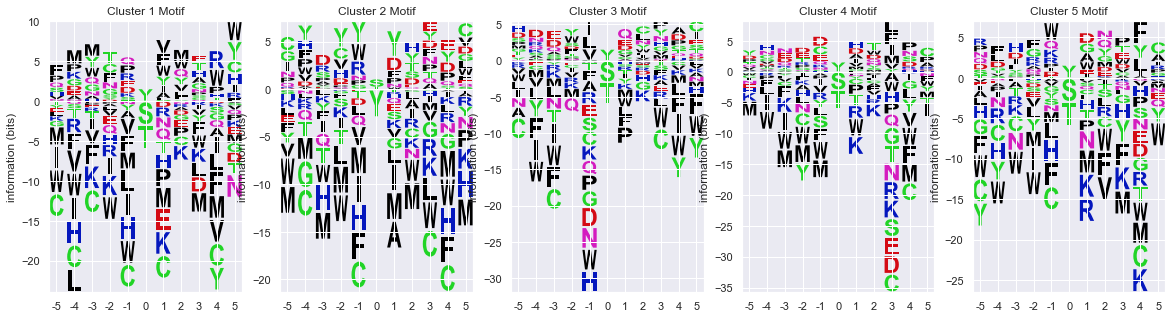

In [19]:
_, ax = plt.subplots(1, 5, figsize=(20, 5))

pssms = pam_model.pssms(PsP_background=True)
motifs = [pssms[0], pssms[1], pssms[2], pssms[3], pssms[4]]
plotMotifs(motifs, titles=["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"], axes=ax)

In [4]:
pspls = PSPLdict()
_, ax = plt.subplots(1, 5, figsize=(20, 5))
abl = pd.DataFrame(pspls["ABL"])
egfr = pd.DataFrame(pspls["EGFR"])
alk = pd.DataFrame(pspls["ALK"])
src = pd.DataFrame(pspls["SRC"])
yes = pd.DataFrame(pspls["YES"])
abl.index = pssms[0].index
egfr.index = pssms[0].index
alk.index = pssms[0].index
src.index = pssms[0].index
yes.index = pssms[0].index
plotMotifs([abl, egfr, alk, src, yes], titles=["ABL", "EGFR", "ALK", "SRC", "YES"], axes=ax)

NameError: name 'pssms' is not defined